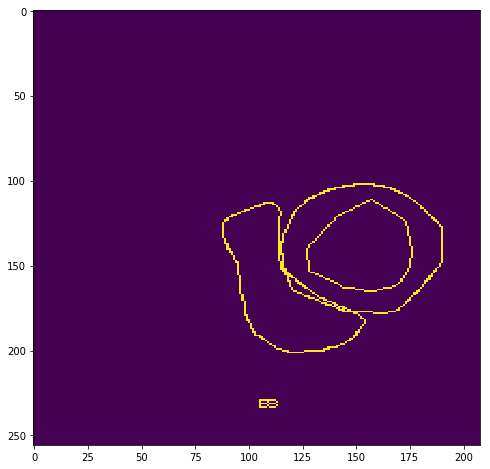

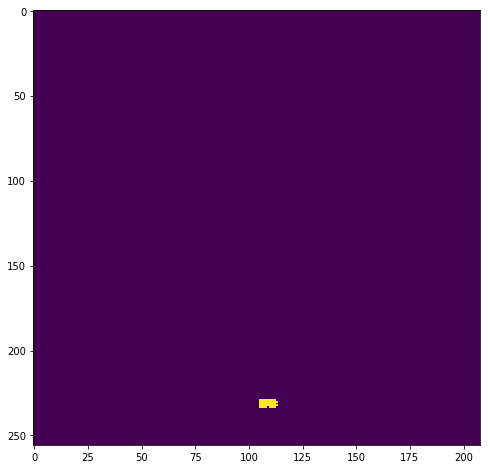

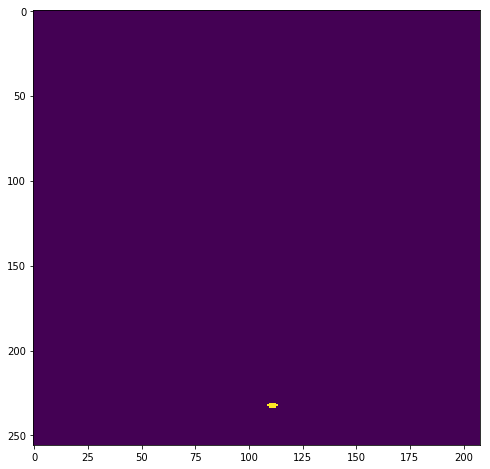

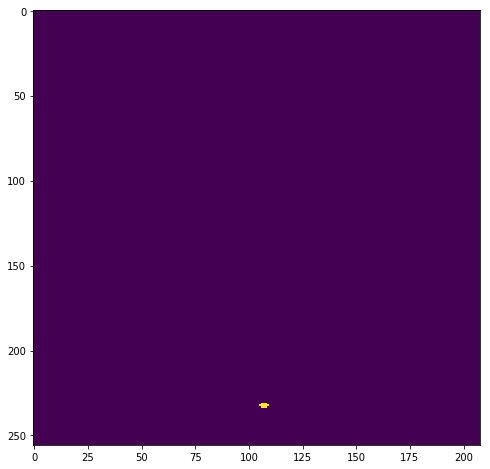

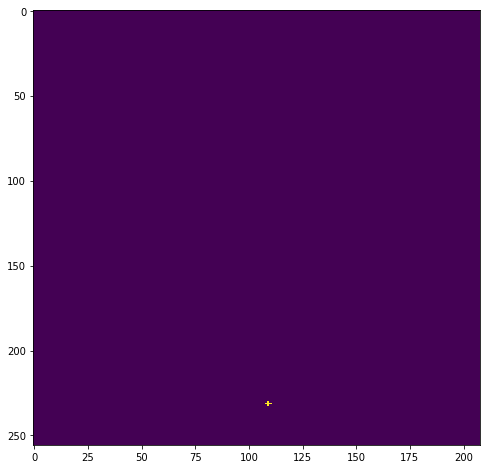

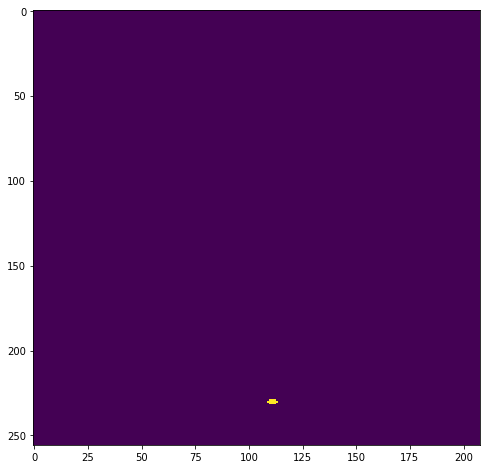

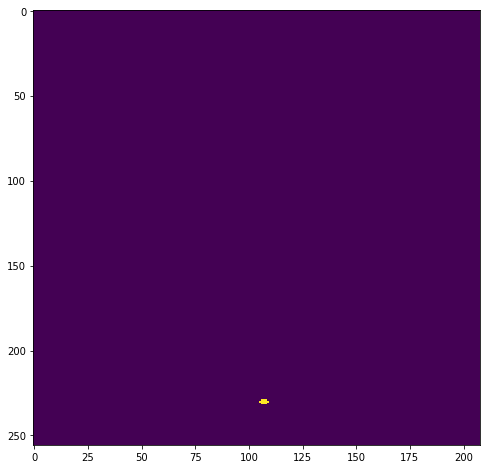

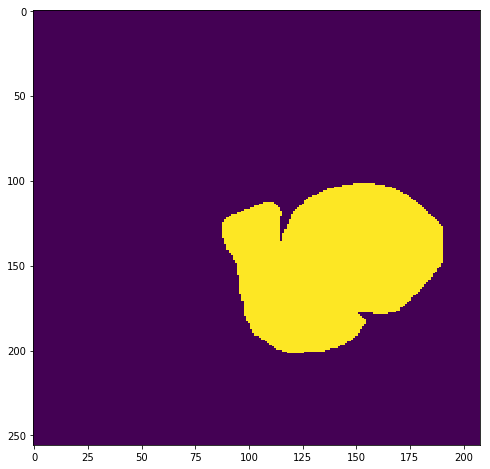

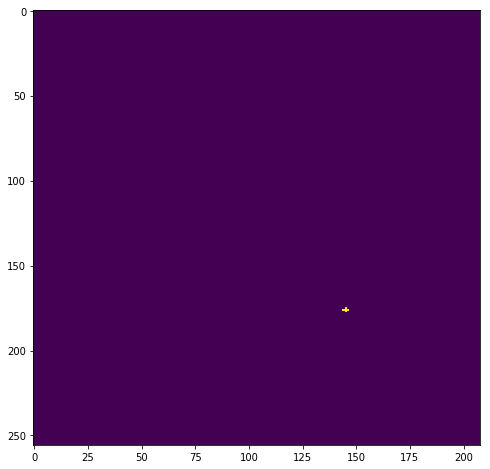

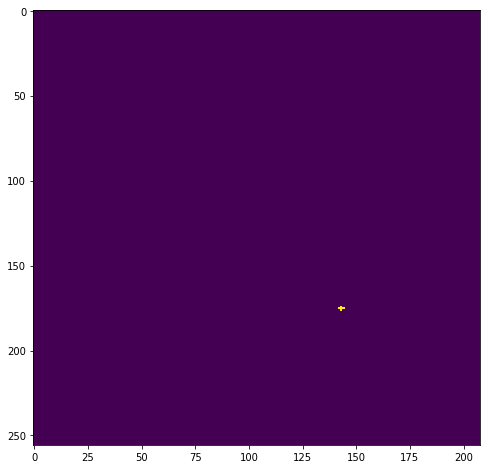

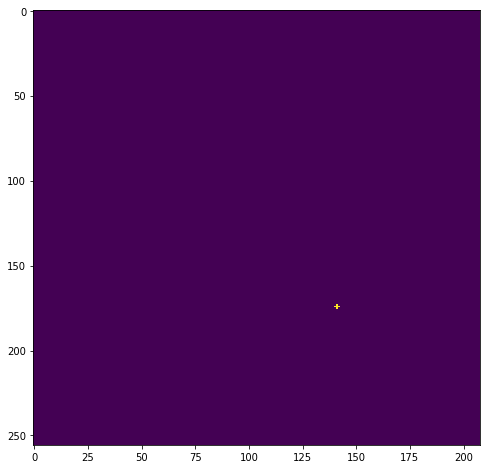

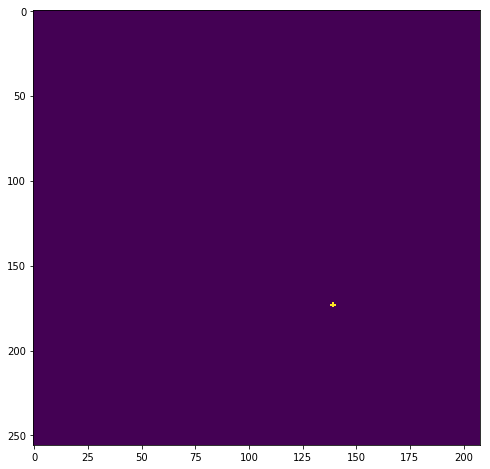

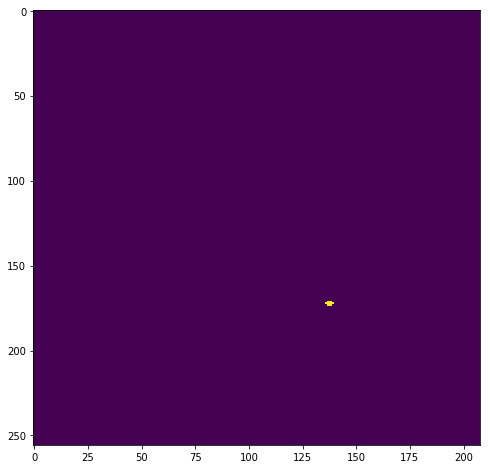

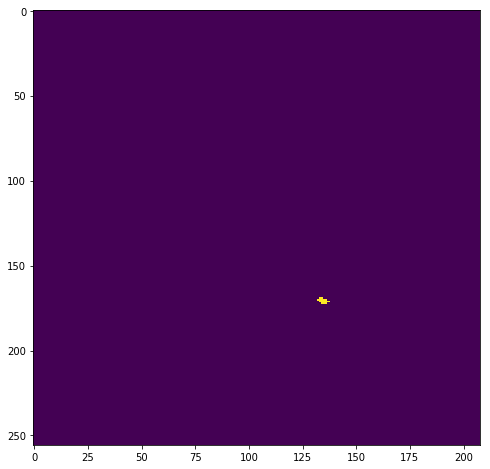

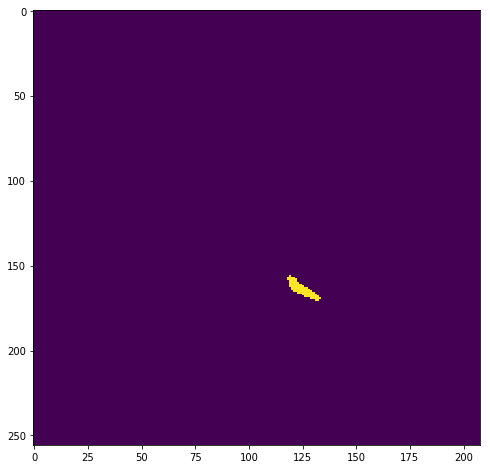

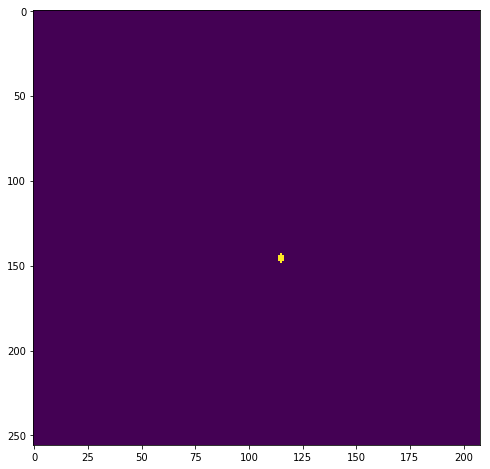

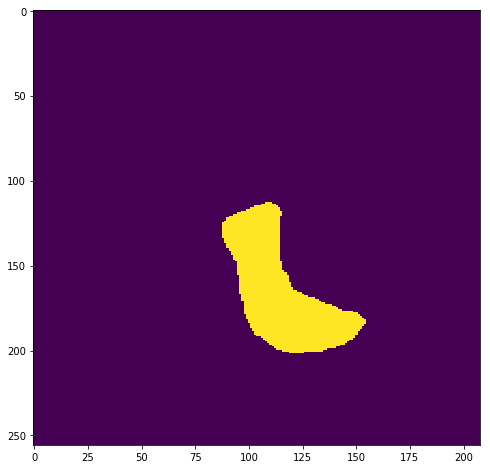

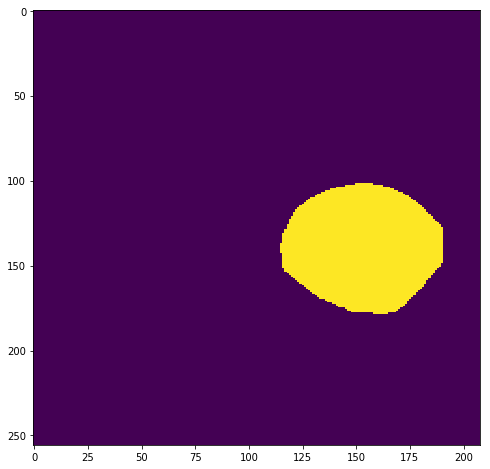

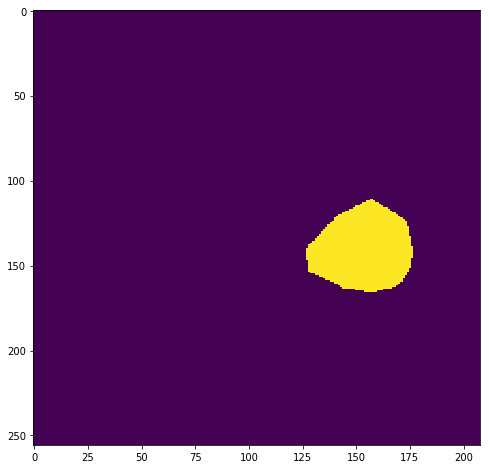

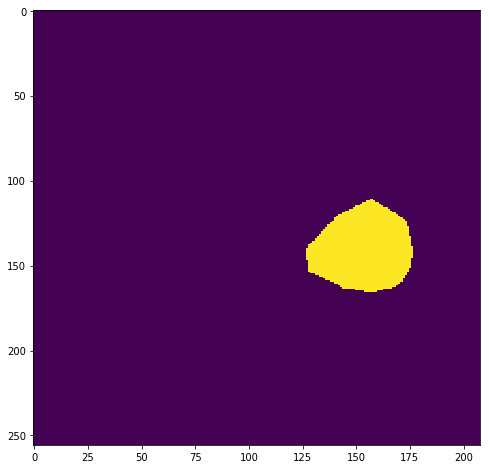

19


In [14]:
import dicom
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

files = glob.glob("/home/anon/Argus/ADT_24593246_20170918/_0054_Argus_-_20170922_10_01/*.dcm")

for f in files:

    data = dicom.read_file(f)
    if len(data.dir("overlay")):
        # overlay_px_data = ds[0x6000, 0x3000].value
        # rows = ds[0x6000, 0x0010].value
        # cols=ds[0x6000, 0x0011].value

        # arr=np.fromstring(overlay_px_data, dtype="uint8")
        # arr=np.unpackbits(arr)
        # arr=np.reshape(arr, (rows, cols))

        # plt.imshow(arr, cmap="gray")
        # plt.show()

        i_overlay = 0
        n_bits = 8

        # On (60xx,3000) are stored ovelays.
        # First is (6000,3000), second (6002,3000), third (6004,3000),
        # and so on.
        dicom_tag1 = 0x6000 + 2 * i_overlay

        overlay_raw = data[dicom_tag1, 0x3000].value

        # On (60xx,0010) and (60xx,0011) is stored overlay size
        rows = data[dicom_tag1, 0x0010].value  # rows = 512
        cols = data[dicom_tag1, 0x0011].value  # cols = 512

        decoded_linear = np.zeros(len(overlay_raw) * n_bits)

        # Decoding data. Each bit is stored as array element
        # TODO neni tady ta jednička blbě?
        for i in range(1, len(overlay_raw)):
            for k in range(0, n_bits):
                byte_as_int = ord(overlay_raw[i])
                decoded_linear[i * n_bits + k] = (byte_as_int >> k) & 0b1

        # verlay = np.array(pol)
        if np.sum(decoded_linear) > 71 and np.sum(decoded_linear) < 2000:
            overlay_slice = np.reshape(decoded_linear, [rows, cols])
#             plt.figure()
#             plt.imshow(overlay_slice, cmap="gray", aspect="auto")
#             plt.show()
#             print(np.sum(decoded_linear))
            im = np.array(overlay_slice * 255, dtype = np.uint8)
            threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
#             plt.imshow(threshed, cmap="gray", aspect="auto")
#             plt.show()
            image, contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            
            if len(contours) == 19:
                
                fig, ax = plt.subplots(figsize=(8, 8))
                plt.imshow(overlay_slice, aspect="auto")
                plt.show()
                
                for cnt in contours:
                    fig, ax = plt.subplots(figsize=(8, 8))
                    tmpImg = np.zeros(image.shape)
                    cv2.fillPoly(tmpImg, pts =[cnt], color=(255,255,255))
                    plt.imshow(tmpImg, aspect="auto")
                    plt.show()
            
                print(len(contours))
#             print(contours)
#             break